In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df['Vehicle Class'].value_counts

: 

In [37]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [38]:
df.isnull().all()

Make                                False
Model                               False
Vehicle Class                       False
Engine Size(L)                      False
Cylinders                           False
Transmission                        False
Fuel Type                           False
Fuel Consumption City (L/100 km)    False
Fuel Consumption Hwy (L/100 km)     False
Fuel Consumption Comb (L/100 km)    False
Fuel Consumption Comb (mpg)         False
CO2 Emissions(g/km)                 False
dtype: bool

In [39]:
df.isnull().values.any()

False

In [40]:
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(6282, 12)

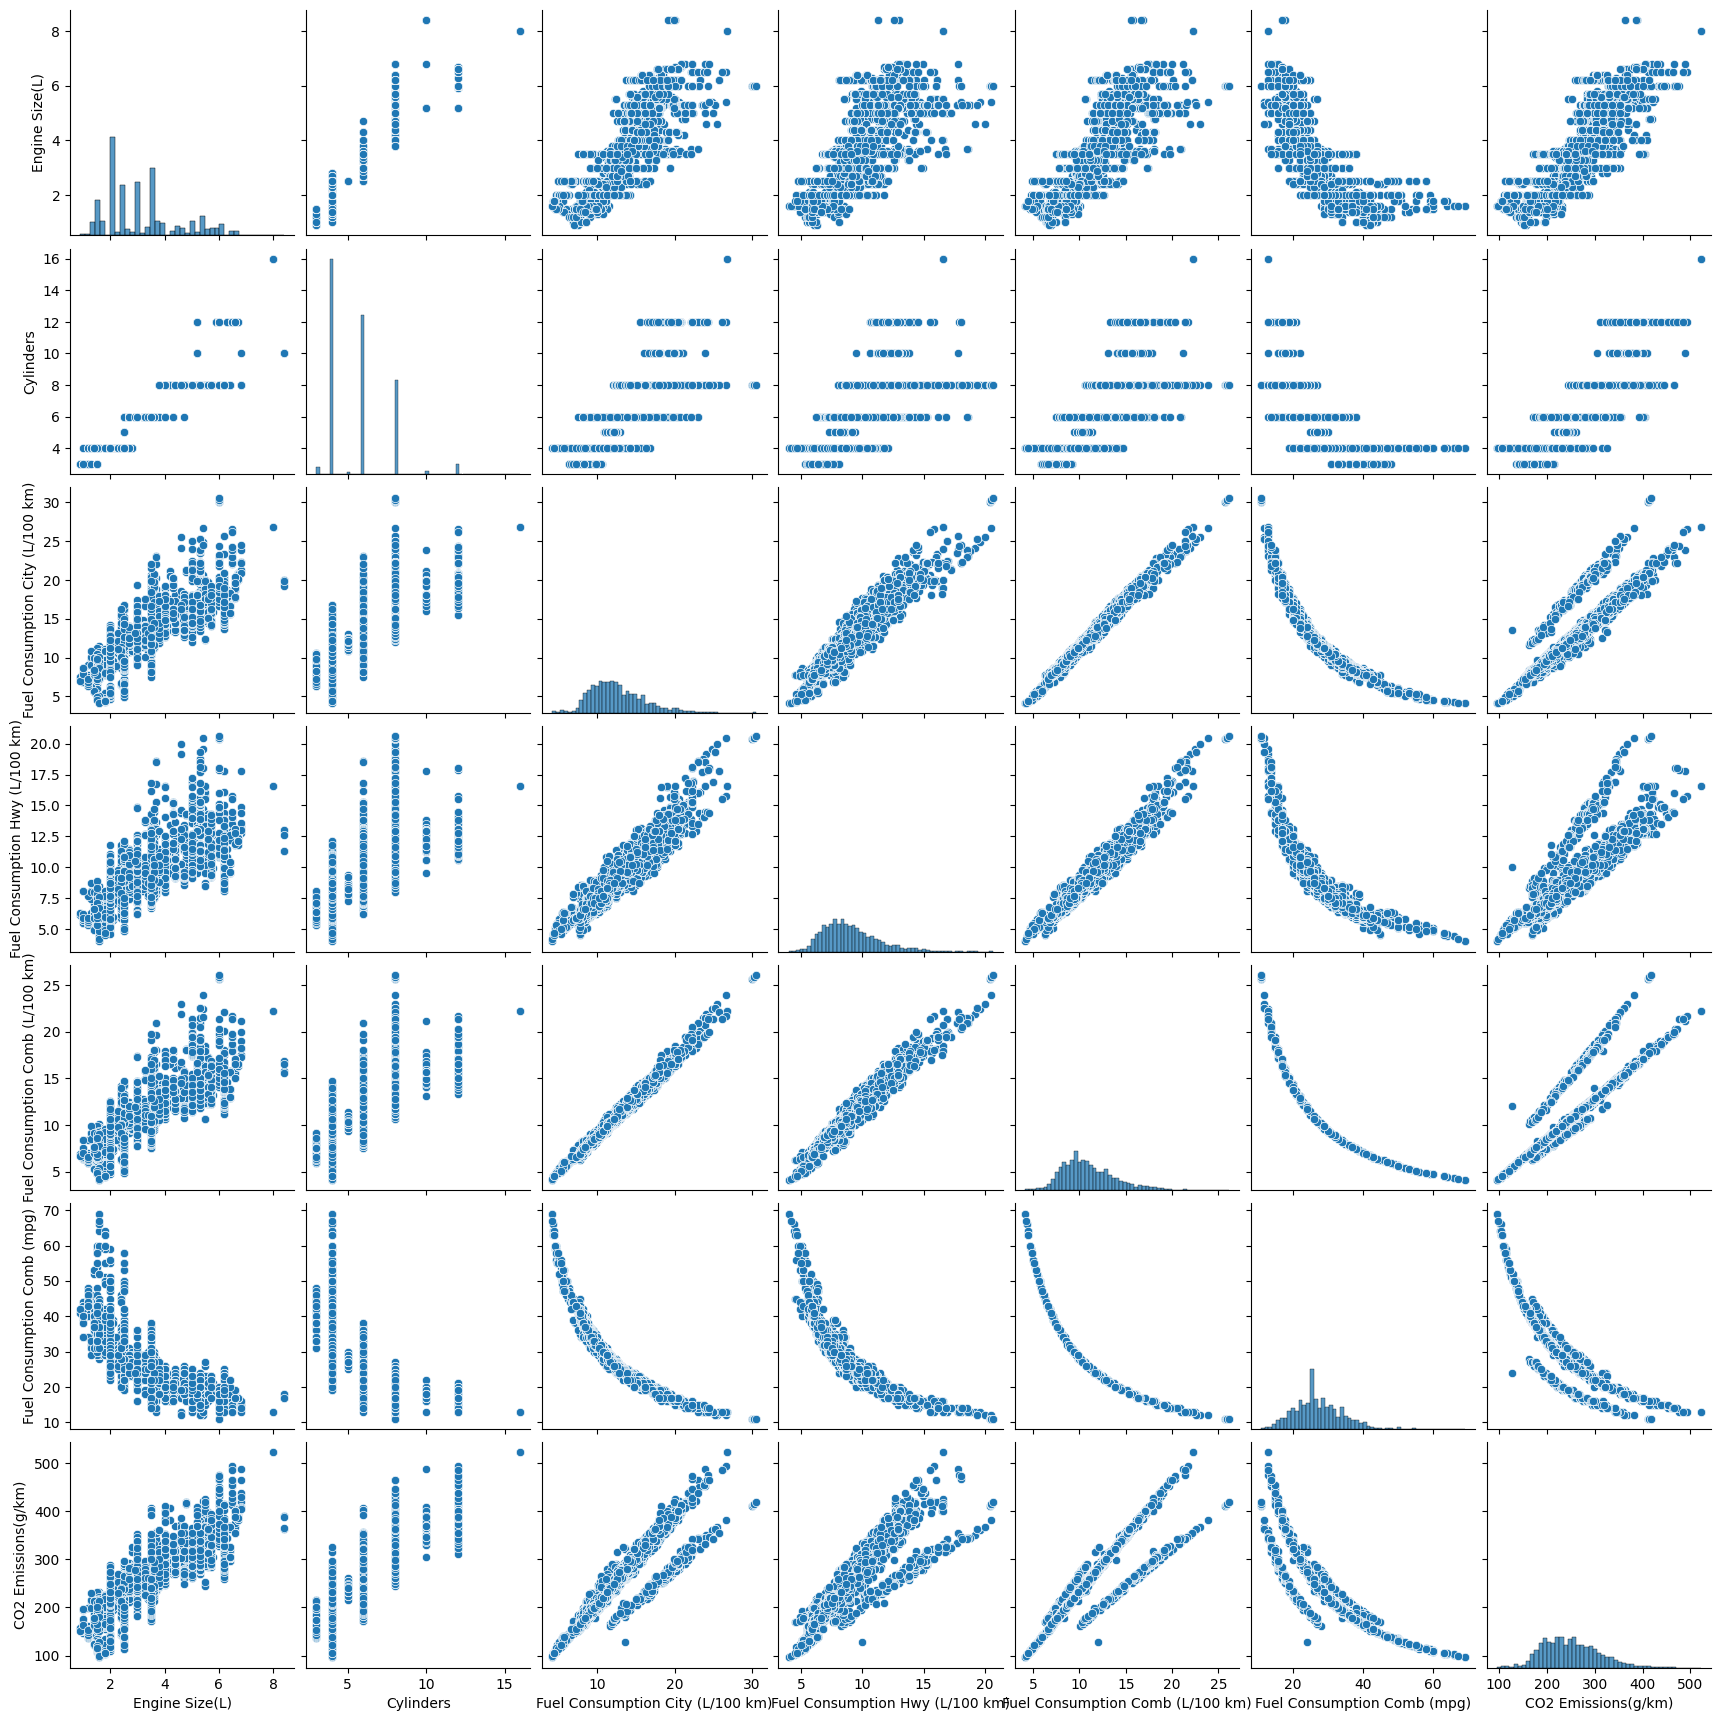

In [41]:
sns.pairplot(df)

In [42]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_features

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions(g/km)']

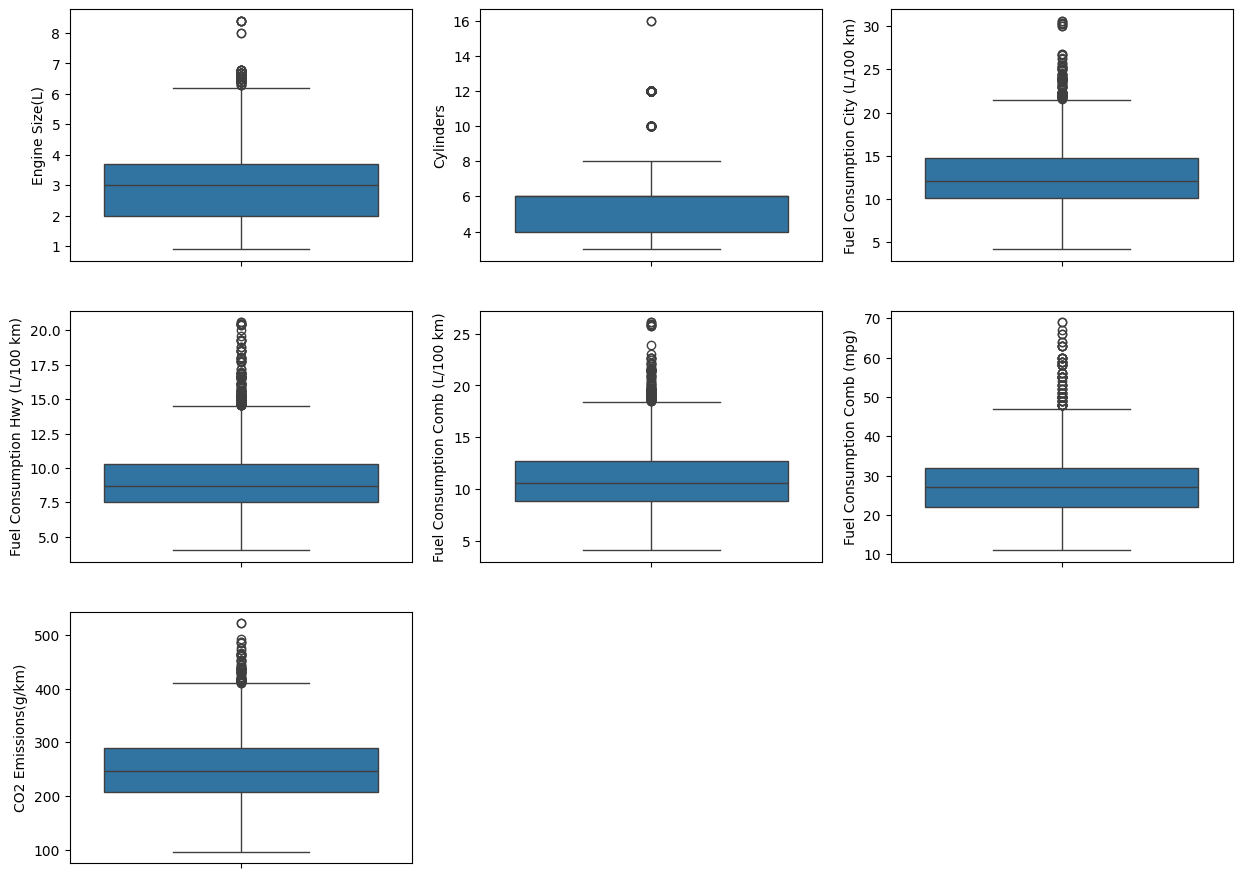

In [43]:
j=1
fig = plt.figure(figsize=(15,15))
for i in numeric_features:
    plt.subplot(4,3,j)
    sns.boxplot(df[i])
    j=j+1

Text(0.5, 1.0, 'Correlation Heatmap')

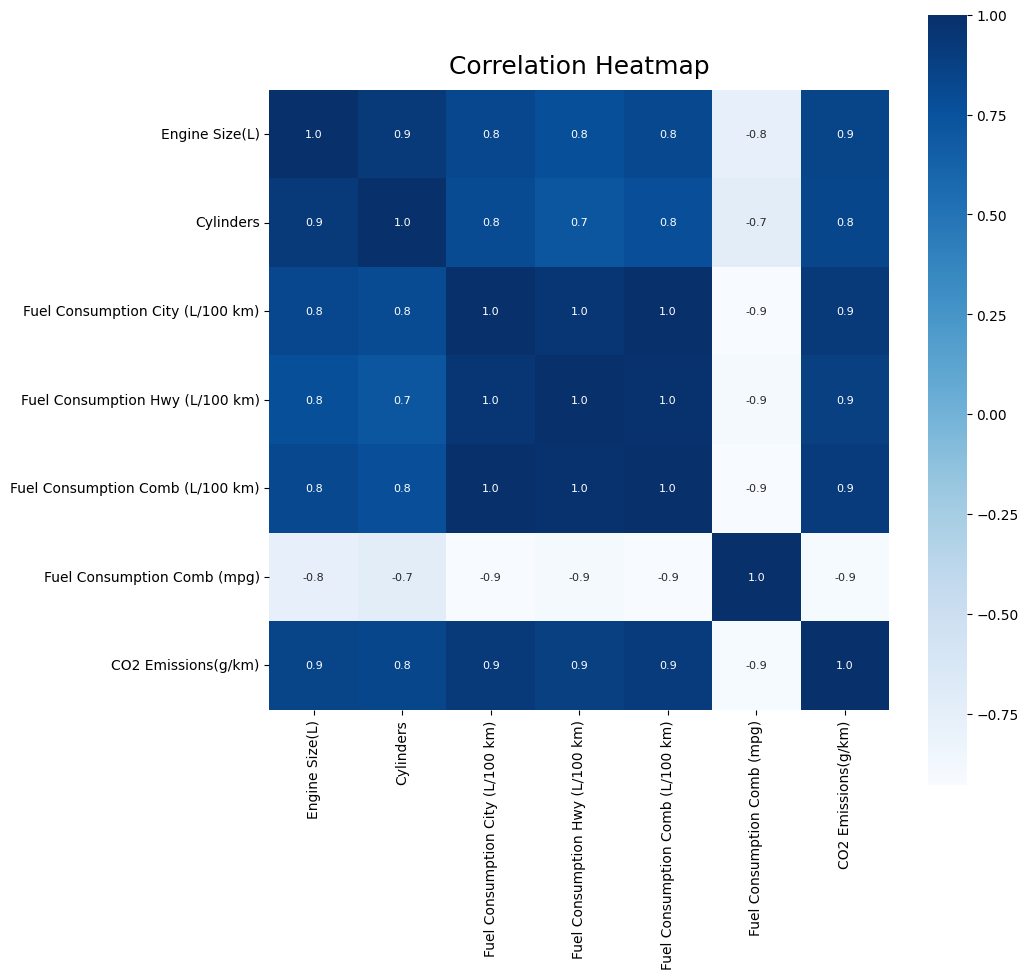

In [44]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(numeric_df.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)


In [45]:
df.drop(columns=['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'], inplace = True)
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,29,232


In [46]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [47]:
for i in categorical_features:
    print(i,':',df[i].nunique())

Make : 42
Model : 2053
Vehicle Class : 16
Transmission : 27
Fuel Type : 5


In [48]:
df.drop(columns = ['Make', 'Model', 'Transmission'], inplace = True)

In [49]:
Encoded_FeulType = pd.get_dummies(df['Fuel Type'],prefix='Fuel',drop_first=True)
Encoded_VehClass = pd.get_dummies(df['Vehicle Class'], prefix = 'Vehicle', drop_first = True)
df.drop(columns = ['Fuel Type', 'Vehicle Class'], inplace = True)
df_encoded = pd.concat([df, Encoded_FeulType, Encoded_VehClass], axis=1)
df_encoded.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel_E,Fuel_N,Fuel_X,Fuel_Z,Vehicle_FULL-SIZE,...,Vehicle_PICKUP TRUCK - STANDARD,Vehicle_SPECIAL PURPOSE VEHICLE,Vehicle_STATION WAGON - MID-SIZE,Vehicle_STATION WAGON - SMALL,Vehicle_SUBCOMPACT,Vehicle_SUV - SMALL,Vehicle_SUV - STANDARD,Vehicle_TWO-SEATER,Vehicle_VAN - CARGO,Vehicle_VAN - PASSENGER
0,2.0,4,8.5,33,196,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2.4,4,9.6,29,221,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1.5,4,5.9,48,136,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3.5,6,11.1,25,255,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,3.5,6,10.6,27,244,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [50]:
df_encoded.drop_duplicates(keep='first', inplace=True)

In [51]:
df_encoded.shape

(4061, 24)

In [52]:
X = df.drop(['CO2 Emissions(g/km)'], axis=1)
y = df['CO2 Emissions(g/km)']

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
rf = RandomForestRegressor(n_estimators=100)
steps = [('sc', sc),('rf', rf)]
rf_pipeline = Pipeline(steps)
cv = cross_val_score(rf_pipeline, X_train, y_train, scoring = 'neg_mean_squared_error', cv=4)
cv.mean()

-94.37335090182357

In [56]:
rfnew = RandomForestRegressor(random_state=2)
rf_pipeline1 = Pipeline(steps = [('sc', sc), ('rfnew', rfnew)])
params = dict(rfnew__max_depth = list(range(2,8)), rfnew__n_estimators = list(range(50,150)))
rcv = RandomizedSearchCV(rf_pipeline1, params, scoring='neg_mean_squared_error', cv=4)
rcv.fit(X_train, y_train)
rcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('rfnew',
   RandomForestRegressor(max_depth=7, n_estimators=145, random_state=2))],
 'verbose': False,
 'sc': StandardScaler(),
 'rfnew': RandomForestRegressor(max_depth=7, n_estimators=145, random_state=2),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'rfnew__bootstrap': True,
 'rfnew__ccp_alpha': 0.0,
 'rfnew__criterion': 'squared_error',
 'rfnew__max_depth': 7,
 'rfnew__max_features': 1.0,
 'rfnew__max_leaf_nodes': None,
 'rfnew__max_samples': None,
 'rfnew__min_impurity_decrease': 0.0,
 'rfnew__min_samples_leaf': 1,
 'rfnew__min_samples_split': 2,
 'rfnew__min_weight_fraction_leaf': 0.0,
 'rfnew__monotonic_cst': None,
 'rfnew__n_estimators': 145,
 'rfnew__n_jobs': None,
 'rfnew__oob_score': False,
 'rfnew__random_state': 2,
 'rfnew__verbose': 0,
 'rfnew__warm_start': False}

In [57]:
rf_final = RandomForestRegressor(max_depth=7, n_estimators=145, random_state=2)
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=145, random_state=2)

In [58]:
y_test_pred = rf_final.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
mse

119.3002996525537

In [60]:
r2_squared = r2_score(y_test, y_test_pred)
r2_squared*100

96.70523445671623

In [62]:
df['CO2 Emissions(g/km)']

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 6282, dtype: int64

In [64]:
min = df['CO2 Emissions(g/km)'].min()
max = df['CO2 Emissions(g/km)'].max()
range = max-min
range

426